## **Bidirectional LSTM**

Bi-LSTM are an extension of traditional LSTMs used for improving model performance on sequence classification problems. This structure allows the networks to have both backward and forward information about the sequence at every time step.

<img src='https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-25_at_8.54.27_PM.png' style='width: 300px; height: 100px; user-select: auto;'></img>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split 

In [2]:
data=pd.read_csv('apple-twitter-sentiment-texts.csv')
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


# Cleaning Text

In [3]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
lines=[]

for i,line in enumerate(data['text']):
  for ele in line:
    if ele in string.punctuation:
      line=line.replace(ele,'')
  lines.append(line)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def new_dataset(data,target):
  lines_=pd.DataFrame(data=data)
  new_data=[lines_,target]
  concat=pd.concat(new_data,axis=1)
  return concat

Creating New Dataset

In [5]:
new_data=new_dataset(lines,data['sentiment'])
new_data

,0,sentiment
0,Wow Yall needa step it up Apple RT heynyla Mus...,-1
1,What Happened To Apple Inc httptcoFJEXI3oP0U...,0
2,Thank u apple I can now compile all of the pic...,1
3,The oddly uplifting story of the Apple cofound...,0
4,apple can i exchange my iphone for a different...,0
...,...,...
1625,Those PICK UP THE SLACK YOU FUCK BOYS Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,umogames Apple ended up getting a new computer...,0
1628,The 19YearOld WizKid Who Turned Down Apple Has...,0


In [6]:
new_data[0]=new_data[0].astype('string')

In [7]:
new_data

,0,sentiment
0,Wow Yall needa step it up Apple RT heynyla Mus...,-1
1,What Happened To Apple Inc httptcoFJEXI3oP0U...,0
2,Thank u apple I can now compile all of the pic...,1
3,The oddly uplifting story of the Apple cofound...,0
4,apple can i exchange my iphone for a different...,0
...,...,...
1625,Those PICK UP THE SLACK YOU FUCK BOYS Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,umogames Apple ended up getting a new computer...,0
1628,The 19YearOld WizKid Who Turned Down Apple Has...,0


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   0          1630 non-null   string
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), string(1)
memory usage: 25.6 KB


In [9]:
import nltk
new_lines=[]
for line in new_data[0]:
  lines=nltk.tokenize.sent_tokenize
  new_lines.append(lines)

### Tokenization and Padding the sequence input

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
new_list=[]

nltk.download('punkt')
from keras.preprocessing.text import Tokenizer
def sequence_data_dataset(data,n):
  # for str_ in data[0]:
  
  # tokens=nltk.word_tokenize(data)
  # sents=nltk.sent_tokenize(data)
  tokenize=Tokenizer(num_words=5000)
  # if len(tokens)<n:
  # for i in range(0,len(sents),1):
  tokenize.fit_on_texts(data)
  tokens_=tokenize.texts_to_sequences(data)
  tokens_=pad_sequences(tokens_,padding='post',maxlen=n)
  
  return tokens_,tokenize
#   concat=[pd.DataFrame(data=new_list),data['sentiment']]
#   return pd.concat(concat,axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
new_dataset,tokenize=sequence_data_dataset(new_data[0],7)
new_dataset
new_dataset.shape

(1630, 7)

In [12]:
new_dataset

array([[   2,  323,  366, ...,  159,   14, 1955],
       [   1,   44, 1956, ...,    1, 1957, 1958],
       [   6, 1960,   19, ...,   76,  674, 1961],
       ...,
       [ 475,   48,   14, ..., 1099,  217,  808],
       [1003,  212,    1, ...,   32,    5,  798],
       [  23,  682,  170, ...,  708,    4,   24]], dtype=int32)

In [13]:
X=new_dataset
# Y=new_data['sentiment']
Y = pd.get_dummies(new_data['sentiment'])

### splitting the Dataset(New) into train and test

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=0)

In [15]:
x_train.shape

(1304, 7)

In [16]:
y_train.shape


(1304, 3)

## Bidirectional-LSTM VS CNN 

In [80]:
model1 = keras.Sequential([
    keras.layers.Embedding(6000, 15, input_length=7),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])

# compiles model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model1.summary()

num_epochs = 30
history1 = model1.fit(x_train,y_train, epochs=num_epochs, batch_size = 128, verbose=1, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 7, 15)             90000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              40960     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 131,347
Trainable params: 131,347
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
8/8 [==============================] - 5s 148ms/step - loss: 1.0824 - accuracy: 0.4733 - val_loss: 1.04

In [18]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


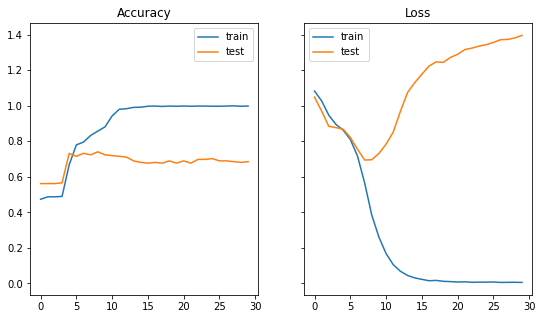

<Figure size 576x720 with 0 Axes>

In [81]:
fig,ax=plt.subplots(1,2,sharey=True,figsize=(9,5))
fig=plt.figure(figsize=(8,10))

ax[0].plot(pd.DataFrame(history1.history['accuracy']))
ax[0].plot(pd.DataFrame(history1.history['val_accuracy']))
ax[0].set_title('Accuracy')
ax[0].legend(['train','test'])

ax[1].plot(pd.DataFrame(history1.history['loss']))
ax[1].plot(pd.DataFrame(history1.history['val_loss']))
ax[1].set_title('Loss')
ax[1].legend(['train','test'])

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
# from tf.keras.optimizers import SGD
# from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=7))
model.add(Dropout(0.4))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit( x_train, y_train,
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 7, 32)             160000    
                                                                 
 dropout_2 (Dropout)         (None, 7, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 3, 32)             0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                 

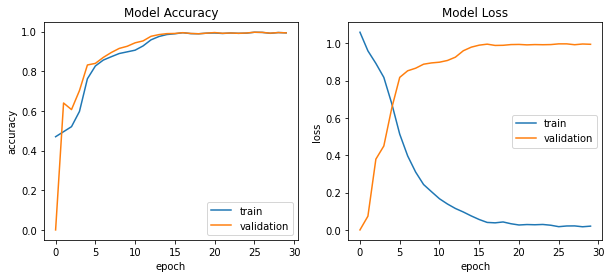

In [44]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['precision_1'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['recall_1'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

## Prediction

In [67]:
def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=7
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenize.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [78]:
str2='WhoaBiebz GET YOUR SHIT TOGETHER OR I WILL GUY A SAMSUNG GALAXY S5 APPLE'
str2=str2.lower()
output2=predict_class([str2])

The predicted sentiment is Negative


In [76]:
output1=predict_class(['This tweet is dangerous'])

The predicted sentiment is Positive


## Confusion Matrix

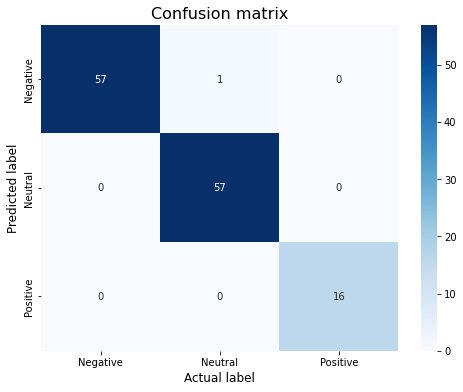

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(x_test,y_test):
  sentiment_classes = ['Negative', 'Neutral', 'Positive']
  y_pred=model.predict(x_test)
  cm=confusion_matrix(np.argmax(y_pred,axis=1),np.argmax(np.array(y_test),axis=1))
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
  plt.title('Confusion matrix', fontsize=16)
  plt.xlabel('Actual label', fontsize=12)
  plt.ylabel('Predicted label', fontsize=12)
  # # print(np.argmax(y_pred,axis=1))
  # print(sentiment[np.argmax(y_pred,axis=1)])
plot_confusion_matrix(x_val,y_val)


Even though we train our model with small number of epochs(30) We can see from both the model that accuracy is pretty much good but it needs to be improved.

There are many things which we could try further for improving the model performance:

(1) Train model for large no of epochs<br>
(2) In cnn the hyperparameters could be hypertuned<br>
(3) The model is overfitting so regularize it with     suitable dropout value.